# Influence of Regularization / Code Part I

In [31]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import time
from tensorflow.python.keras.layers import *
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import regularizers

In [32]:
# Enable GPU: "Runtime"-->"Change Runtime"-->"Hardware Accelerator"
#Check if GPU is enabled
tf.test.gpu_device_name()

''

In [38]:
#2. Import dataset
data = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = data.load_data()
#assert x_rem.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
#assert y_rem.shape == (60000,)
assert y_test.shape == (10000,)
#x_train, x_valid, y_train, y_valid = train_test_split(x_rem, y_rem, test_size=0.15)
assert x_train.shape == (60000, 28, 28)
#assert x_valid.shape == (9000, 28, 28)
assert y_train.shape == (60000,)
#assert y_valid.shape == (9000,)

In [39]:
#Data pre-processing

# reshape data to fit the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#y_valid = to_categorical(y_valid)

# Inspect what the one-hot encoding looks like for the first value
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### EXPERIMENTS

In [16]:
from tensorflow.python.ops.gen_batch_ops import batch
# Set all the hyperparameters to the same for each model

num_iter = 2000
opt = 'adam'
num_filters = 32
kernel_size=3
pool_size = (2,2)
strides= (2,2)
activation = 'relu'
padding = 'SAME'
loss = "categorical_crossentropy"
epochs = 10
batch_size = 128

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 32)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)               

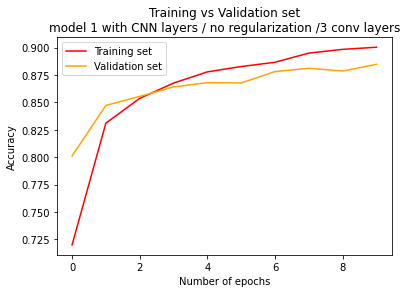

In [ ]:
# Create model 1 with CNN layers / no regularization /3 conv layers
title = 'model 1 with CNN layers / no regularization /3 conv layers'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size= pool_size))

# Add a second conv layer with a stride of 2x2
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, strides = strides))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Add a third conv layer with a stride of 2x2
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, strides = strides))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Flatten the input
model.add(Flatten())

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()



# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
model1 = model.fit(x_train, y_train, validation_split=0.15,batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")




# Evaluate the model 
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Accuracy: %.2f" % (score[1] * 100.0))




# Plot accuracy (val vs test)
from matplotlib import pyplot as plt

plt.plot(model1.history["accuracy"], color = "red", label = "Training set")
plt.plot(model1.history["val_accuracy"], color = "orange", label = "Validation set")

plt.title("Training vs Validation set\n"+title)
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
339/339 [==============================] - 21s 61ms/step - loss: 2.7215 - accuracy: 0.8058 - val_loss: 0.7411 - val_accuracy: 0.8533
Epoch 2/10
339/339 [==============================] - 25s 74ms/step - loss: 0.5239 - accuracy: 0.8714 - 

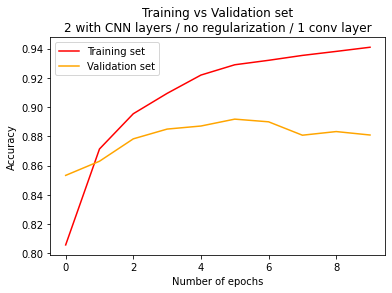

In [ ]:
# Create model 2 with CNN layers / no regularization / 1 conv layer

title = '2 with CNN layers / no regularization / 1 conv layer'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Flatten the input
model.add(Flatten())

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()



# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
model1 = model.fit(x_train, y_train, validation_split=0.15,batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")




# Evaluate the model 
#score = model.evaluate(x_test, y_test, verbose = 0)
#print("Test loss: %.4f" % score[0])
#print("Accuracy: %.2f" % (score[1] * 100.0))




# Plot loss function (val vs test)
from matplotlib import pyplot as plt

plt.plot(model1.history["accuracy"], color = "red", label = "Training set")
plt.plot(model1.history["val_accuracy"], color = "orange", label = "Validation set")

plt.title("Training vs Validation set\n"+title)
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 2, 32)          9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)               

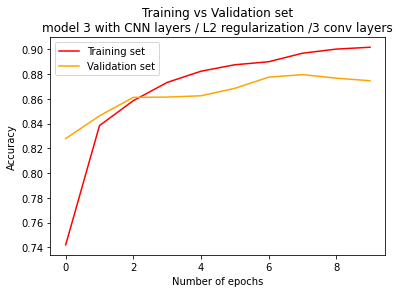

In [ ]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import regularizers

# Create model 3 with CNN layers / L2 regularization /3 conv layers
title = 'model 3 with CNN layers / L2 regularization /3 conv layers'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size= pool_size))

# Add a second conv layer with a stride of 2x2
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, strides = strides))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Add a third conv layer with a stride of 2x2
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, strides = strides))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Flatten the input
model.add(Flatten())

# Add L2 metod
model.add(Dense(100, activation = activation, kernel_regularizer=regularizers.l2(0.00001)))

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()



# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
model1 = model.fit(x_train, y_train, validation_split=0.15,batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")




# Evaluate the model 
#score = model.evaluate(x_test, y_test, verbose = 0)
#print("Test loss: %.4f" % score[0])
#print("Accuracy: %.2f" % (score[1] * 100.0))




# Plot loss function (val vs test)
from matplotlib import pyplot as plt

plt.plot(model1.history["accuracy"], color = "red", label = "Training set")
plt.plot(model1.history["val_accuracy"], color = "orange", label = "Validation set")

plt.title("Training vs Validation set\n"+title)
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               627300    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
339/339 [==============================] - 25s 73ms/step - loss: 2.0214 - accuracy: 0.8000 - val_loss: 

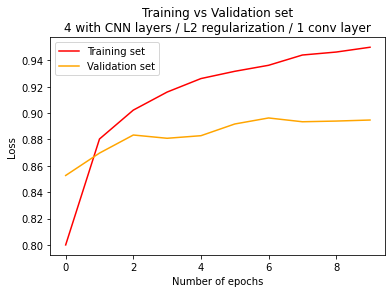

In [ ]:
# Create model 4 with CNN layers / L2 regularization / 1 conv layer

title = '4 with CNN layers / L2 regularization / 1 conv layer'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Flatten the input
model.add(Flatten())

# Add L2 metod
model.add(Dense(100, activation = activation, kernel_regularizer=regularizers.l2(0.00001)))

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()



# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
model1 = model.fit(x_train, y_train, validation_split=0.15,batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")




# Evaluate the model 
#score = model.evaluate(x_test, y_test, verbose = 0)
#print("Test loss: %.4f" % score[0])
#print("Accuracy: %.2f" % (score[1] * 100.0))




# Plot loss function (val vs test)
from matplotlib import pyplot as plt

plt.plot(model1.history["accuracy"], color = "red", label = "Training set")
plt.plot(model1.history["val_accuracy"], color = "orange", label = "Validation set")

plt.title("Training vs Validation set\n"+title)
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 2, 2, 32)         

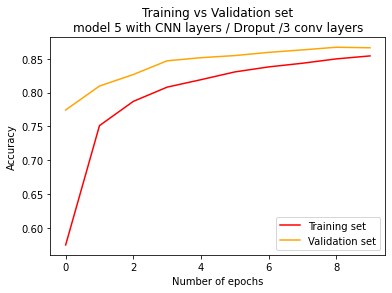

In [ ]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout

# Create model 5 with CNN layers / Dropout /3 conv layers
title = 'model 5 with CNN layers / Droput /3 conv layers'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size= pool_size))

#Dropout
model.add(Dropout(0.1))

# Add a second conv layer with a stride of 2x2
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, strides = strides))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

#Dropout
model.add(Dropout(0.1))

# Add a third conv layer with a stride of 2x2
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, strides = strides))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

#Dropout
model.add(Dropout(0.1))

# Flatten the input
model.add(Flatten())

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()



# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
model1 = model.fit(x_train, y_train, validation_split=0.15,batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")




# Evaluate the model 
#score = model.evaluate(x_test, y_test, verbose = 0)
#print("Test loss: %.4f" % score[0])
#print("Accuracy: %.2f" % (score[1] * 100.0))




# Plot loss function (val vs test)
from matplotlib import pyplot as plt

plt.plot(model1.history["accuracy"], color = "red", label = "Training set")
plt.plot(model1.history["val_accuracy"], color = "orange", label = "Validation set")

plt.title("Training vs Validation set\n"+title)
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
339/339 [==============================] - 24s 69ms/step - loss: 3.4073 - accuracy: 0.7894 - val_loss: 0.

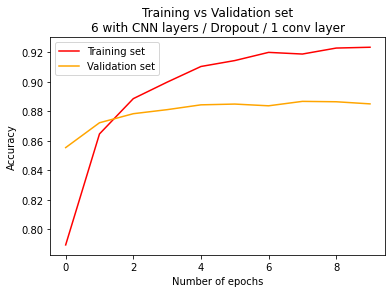

In [ ]:
# Create model 6 with CNN layers / Dropout / 1 conv layer

title = '6 with CNN layers / Dropout / 1 conv layer'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

#Dropout
model.add(Dropout(0.1))

# Flatten the input
model.add(Flatten())

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()



# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
model1 = model.fit(x_train, y_train, validation_split=0.15,batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")




# Evaluate the model 
#score = model.evaluate(x_test, y_test, verbose = 0)
#print("Test loss: %.4f" % score[0])
#print("Accuracy: %.2f" % (score[1] * 100.0))




# Plot loss function (val vs test)
from matplotlib import pyplot as plt

plt.plot(model1.history["accuracy"], color = "red", label = "Training set")
plt.plot(model1.history["val_accuracy"], color = "orange", label = "Validation set")

plt.title("Training vs Validation set\n"+title)
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)               

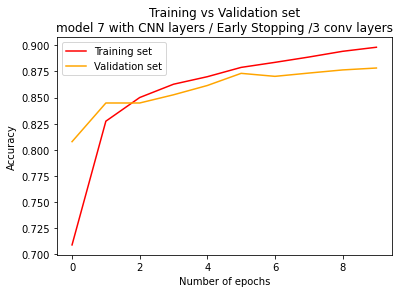

In [ ]:
# Create model 7 with CNN layers / Early Stopping /3 conv layers

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

title = 'model 7 with CNN layers / Early Stopping /3 conv layers'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size= pool_size))

# Add a second conv layer with a stride of 2x2
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, strides = strides))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Add a third conv layer with a stride of 2x2
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, strides = strides))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Flatten the input
model.add(Flatten())

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()


#Early Stopping

es = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, restore_best_weights=True, patience = 1)
mc = ModelCheckpoint("best_model_tutorial", monitor = "val_loss", save_best_only = True, mode = "min")


# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
model1 = model.fit(x_train, y_train, validation_split=0.15,batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")




# Evaluate the model 
#score = model.evaluate(x_test, y_test, verbose = 0)
#print("Test loss: %.4f" % score[0])
#print("Accuracy: %.2f" % (score[1] * 100.0))




# Plot loss function (val vs test)
from matplotlib import pyplot as plt

plt.plot(model1.history["accuracy"], color = "red", label = "Training set")
plt.plot(model1.history["val_accuracy"], color = "orange", label = "Validation set")

plt.title("Training vs Validation set\n"+title)
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
339/339 [==============================] - 20s 58ms/step - loss: 4.0163 - accuracy: 0.7961 - val_loss: 0.9317 - val_accuracy: 0.8488
Epoch 2/10
339/339 [==============================] - 19s 57ms/step - loss: 0.5709 - accuracy: 0.8686 - 

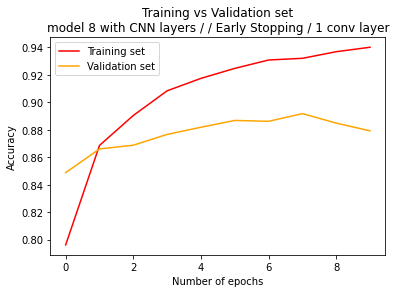

In [ ]:
# Create model 8 with CNN layers / / Early Stopping / 1 conv layer

title = 'model 8 with CNN layers / / Early Stopping / 1 conv layer'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Flatten the input
model.add(Flatten())

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()


#Early Stopping

es = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, restore_best_weights=True, patience = 1)
mc = ModelCheckpoint("best_model_tutorial", monitor = "val_loss", save_best_only = True, mode = "min")



# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
model1 = model.fit(x_train, y_train, validation_split=0.15,batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")




# Evaluate the model 
#score = model.evaluate(x_test, y_test, verbose = 0)
#print("Test loss: %.4f" % score[0])
#print("Accuracy: %.2f" % (score[1] * 100.0))




# Plot loss function (val vs test)
from matplotlib import pyplot as plt

plt.plot(model1.history["accuracy"], color = "red", label = "Training set")
plt.plot(model1.history["val_accuracy"], color = "orange", label = "Validation set")

plt.title("Training vs Validation set\n"+title)
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

### TOP-PERFORMING MODEL

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               627300    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
399/399 [==============================] - 28s 70ms/step - loss: 2.5558 - accuracy: 0.8069
Epoch 2/10
3

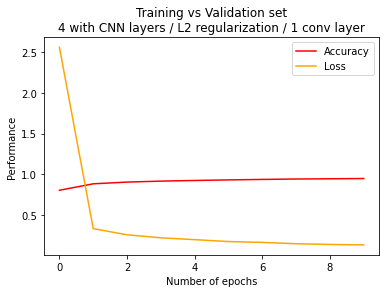

In [20]:
# Training on the whole train dataset on the top performing model from the experiments

# Create model 4 with CNN layers / L2 regularization / 1 conv layer

title = '4 with CNN layers / L2 regularization / 1 conv layer'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Flatten the input
model.add(Flatten())

# Add L2 metod
model.add(Dense(100, activation = activation, kernel_regularizer=regularizers.l2(0.00001)))

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()



# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
top_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")




# Evaluate the model 
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))




# Plot loss function (val vs test)
from matplotlib import pyplot as plt

plt.plot(top_model.history["accuracy"], color = "red", label = "Accuracy")
plt.plot(top_model.history["loss"], color = "orange", label = "Loss")

plt.title("Training vs Validation set\n"+title)
plt.ylabel("Performance")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

# Interpreting CNN Representations / Code Part II

In [135]:
# Training on the whole train dataset on the top performing model from the experiments
# Creating a new model with the bse of best oerformning model
# Create new model with CNN layers / L2 regularization / 1 conv layer

title = 'model with CNN layers / L2 regularization / 1 conv layer'

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# add a conv layer with "same" zero padding
model.add(Conv2D(num_filters, kernel_size = kernel_size, activation = activation, padding = padding, input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = pool_size))

# Flatten the input
model.add(Flatten())

# Add L2 metod
model.add(Dense(100, activation = activation, kernel_regularizer=regularizers.l2(0.00001)))

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()



# Specify the optimizer
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])



# Time how fast the model train
start = time.time()

# Train using adam
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 32)        

'from matplotlib import pyplot as plt\n\nplt.plot(top_model_visual.history["accuracy"], color = "red", label = "Accuracy")\nplt.plot(top_model_visual.history["loss"], color = "orange", label = "Loss")\n\nplt.title("Training vs Validation set\n"+title)\nplt.ylabel("Performance")\nplt.xlabel("Number of epochs")\nplt.legend()\nplt.show()'

In [136]:
# Printing model summary once again

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 32)        

### Visualizing Convolutional Layers

conv2d_16 (3, 3, 1, 32)
conv2d_17 (3, 3, 32, 32)
conv2d_18 (3, 3, 32, 32)
conv2d_19 (3, 3, 32, 32)


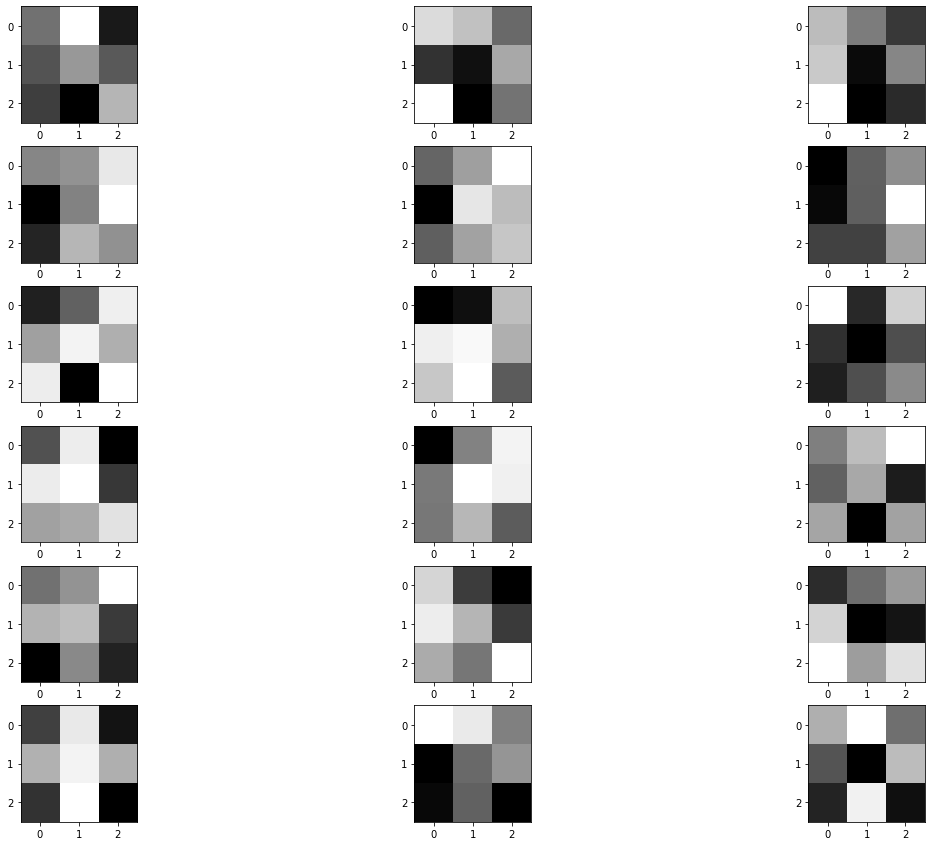

In [145]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
 

 # retrieve weights from the first conv layer
filters , bias = model.layers[2].get_weights()


# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
plt.show()

conv2d_16 (3, 3, 1, 32)
conv2d_17 (3, 3, 32, 32)
conv2d_18 (3, 3, 32, 32)
conv2d_19 (3, 3, 32, 32)


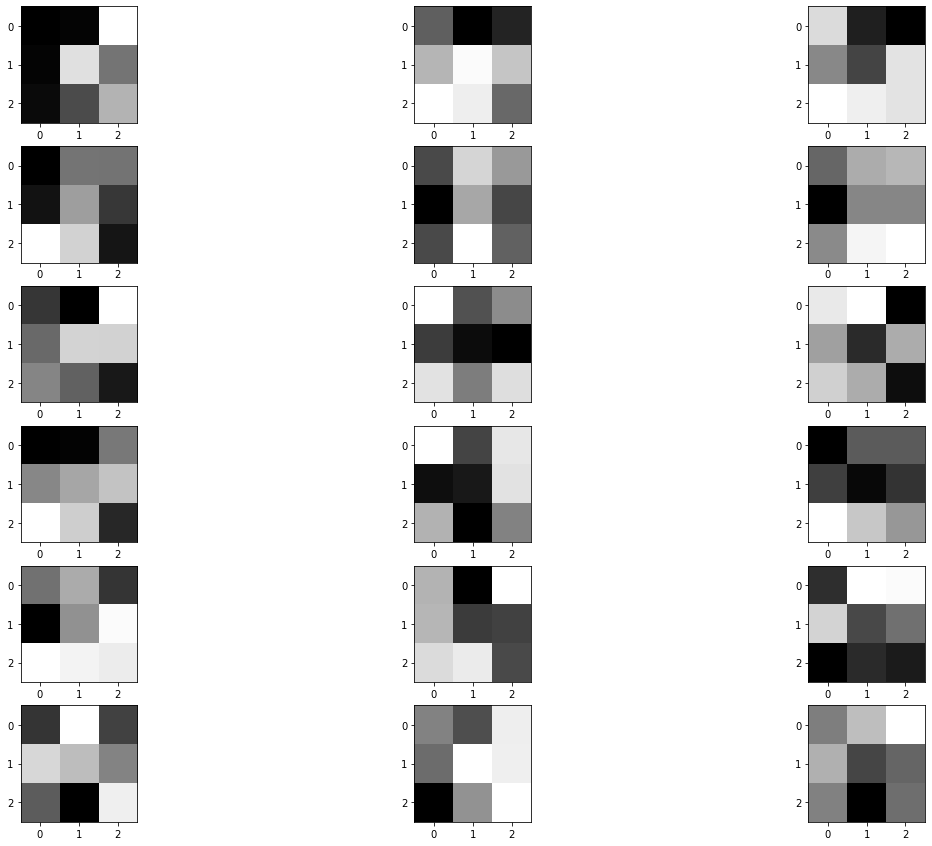

In [150]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
 

 # retrieve weights from the fourth conv layer
filters , bias = model.layers[6].get_weights()


# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
plt.show()